# Practice 3

`airbnb.csv` 데이터셋은 airbnb에 등록된 샌프란시스코 지역의 listing 데이터의 일부이다. 

- 'id': listing id
- 'room_type': 집 또는 방의 형태 (entire home/apt, private room, shared room)
- 'number_of_reviews': 총 리뷰 수
- 'review_scores_rating': 전체 리뷰 점수 
- 'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value': 각 부분의 리뷰 점수
- 'reviews_per_month': 월 평균 리뷰 수 
- 'Downtown': Downtown까지의 거리 
- 'PerCapitaIncome': 해당 지역의 소득수준
- 'most_freq_aspect': listing description에서 가장 많이 나타난 주제


In [21]:
import pandas as pd
import numpy as np
from scipy import stats
from statsmodels import robust

import seaborn as sns
import matplotlib.pylab as plt

data_path = "./data/" # data가 저장되어 있는 경로로 각자 수정 필요 

import matplotlib.font_manager as fm
plt.rc('font', family=fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()) 

In [56]:
data = pd.read_csv(f'{data_path}airbnb.csv')

#### 1. `reviews_per_month`의 평균, 중위수를 계산하고 비교하여 분포의 모양을 추측해보시오. 

In [4]:
data.head()

,id,room_type,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,Downtown,PerCapitaIncome,most_freq_aspect
0,958,Entire home/apt,222.0,97.0,10.0,10.0,10.0,10.0,10.0,9.0,1.77,4068.132073,110777,int_style
1,3850,Private room,167.0,95.0,10.0,10.0,10.0,10.0,10.0,10.0,1.33,6792.053605,93008,comm
2,5858,Entire home/apt,111.0,98.0,10.0,10.0,10.0,10.0,10.0,9.0,0.87,5666.128342,69778,nature
3,7918,Private room,18.0,86.0,8.0,8.0,9.0,9.0,9.0,8.0,0.15,5573.866947,99041,comm
4,8142,Private room,8.0,93.0,9.0,9.0,10.0,10.0,9.0,9.0,0.13,5632.882874,99041,comm


In [5]:
data.reviews_per_month.mean(),data.reviews_per_month.median()
#평균값이 중앙값보다 큰것은 값이 큰 쪽으로 이상치가 있다는 것이다. 그렇기 때문에 분포는 왼쪽으로 치우친 그래프일 것이다.

(1.8882506142506121, 1.03)

<AxesSubplot:>

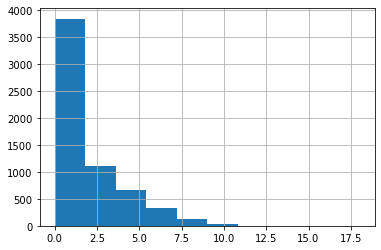

In [6]:
data.reviews_per_month.hist()

<AxesSubplot:ylabel='Density'>

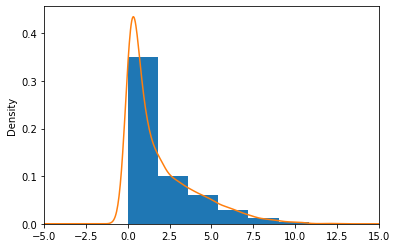

In [9]:
ax=data.reviews_per_month.plot.hist(density=True,xlim=[-5,15])
data.reviews_per_month.plot.density(ax=ax)

#### 2. `reviews_per_month`의 평균과 중위수를 각 `room_type`별로 계산하여 비교하시오.

In [10]:
print(data.groupby('room_type')['reviews_per_month'].mean())
print('----------------------------------------------')
print(data.groupby('room_type')['reviews_per_month'].median())

room_type
Entire home/apt    1.530804
Private room       2.434912
Shared room        1.635855
Name: reviews_per_month, dtype: float64
----------------------------------------------
room_type
Entire home/apt    0.750
Private room       1.815
Shared room        0.735
Name: reviews_per_month, dtype: float64


#### 3.  `room_type`별로 `reviews_per_month`의 차이가 존재하는가? (그룹별 평균을 barplot으로 비교)

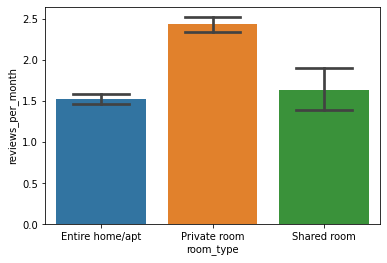

In [12]:
sns.barplot(x='room_type', y='reviews_per_month',  data = data, ci=95, capsize=0.5)
plt.show() #ci=confidence interval

#### 4.   `most_freq_aspect` 별로  `reviews_per_month`의 차이가 존재하는가? (그룹별 평균을 barplot으로 비교)

In [16]:
sort_values = list(data.groupby('most_freq_aspect')['reviews_per_month'].mean().sort_values(ascending=False).index)

In [17]:
data['most_freq_aspect']=data['most_freq_aspect'].astype('category')
data['most_freq_aspect']=data['most_freq_aspect'].cat.reorder_categories(sort_values)
# 그래프 그릴 때 order을 넣어주면 reorder_categories를 안해도 된다.

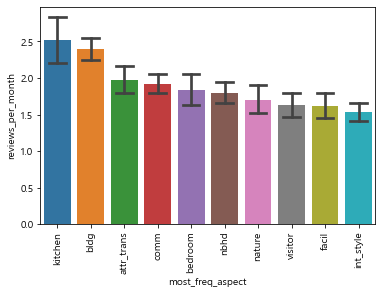

In [62]:
sns.barplot(x='most_freq_aspect', y='reviews_per_month',  data = data, ci=95, capsize=0.5, order = sort_values)
plt.xticks(rotation=90)
plt.show() #ci=confidence interval

#### 5.   `most_freq_aspect` 별로  `reviews_per_month`의 차이가 존재하는가?room_type 별로 비교하여라. (그룹별 평균을 barplot으로 비교)

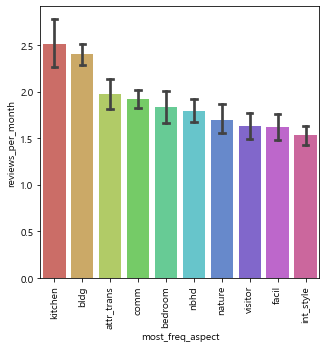

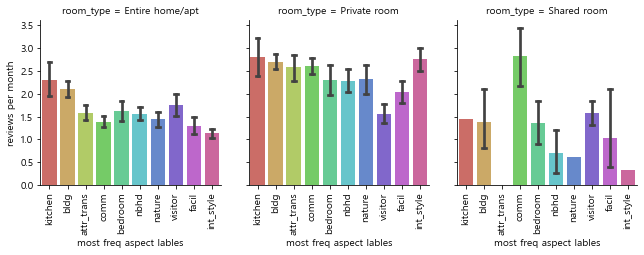

In [61]:
most_freq_aspect_labels = list(data.groupby('most_freq_aspect')['reviews_per_month'].mean().sort_values(ascending=False).index)

fig,ax = plt.subplots(figsize=(5,5))

ax1=sns.barplot(x='most_freq_aspect', y='reviews_per_month', data=data, palette='hls',ci=90, capsize=0.2, order=most_freq_aspect_labels)
ax1.set_xticklabels(most_freq_aspect_labels, rotation='vertical') # x축 목록 바꿔주기

grid1 = sns.FacetGrid(data,  col='room_type')
grid1.map_dataframe(sns.barplot, x='most_freq_aspect',y='reviews_per_month', palette='hls',ci=90, capsize=0.2, order=most_freq_aspect_labels)
grid1.set_xticklabels(rotation='vertical')
grid1.set_axis_labels("most freq aspect lables", "reviews per month")

plt.show()

#### 6. 7개의 review_scores 변수들과 `reviews_per_month` 변수와의 상관계수 행렬과 그것의 heatmap을 통해 변수들 간의 상관관계를 관찰하고 서술하시오.

In [37]:
a = list(data.columns[data.columns.str.contains('_scores')])
a.append('reviews_per_month')

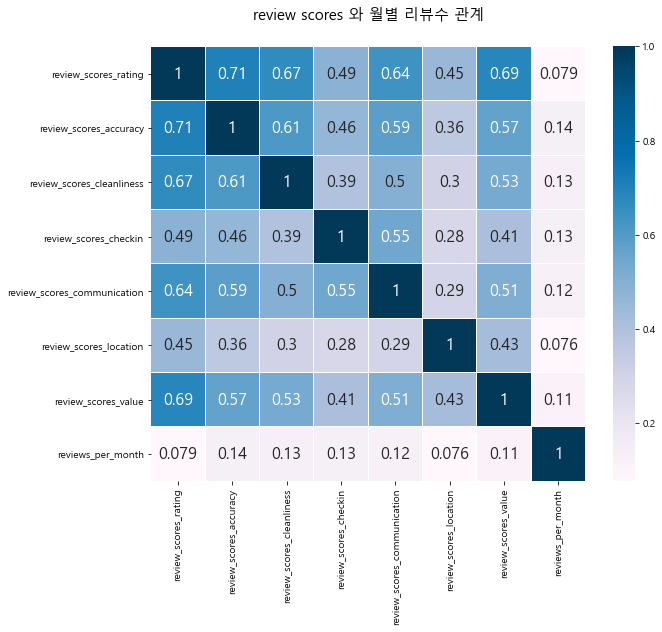

In [39]:
df=data[a]
colormap = plt.cm.PuBu 

plt.figure(figsize=(10, 8)) 
plt.title('review scores 와 월별 리뷰수 관계', y = 1.05, size = 15) 
sns.heatmap(df.corr(), linewidths = 0.1, vmax = 1.0, square = True, cmap = colormap, 
            linecolor = "white", annot = True, annot_kws = {"size" : 16})
plt.show()

In [46]:
df.corr()['reviews_per_month'].reset_index().set_index('index')

,reviews_per_month
index,
review_scores_rating,0.078814
review_scores_accuracy,0.135251
review_scores_cleanliness,0.131440
review_scores_checkin,0.134380
review_scores_communication,0.124630
review_scores_location,0.075669
review_scores_value,0.111472
reviews_per_month,1.000000


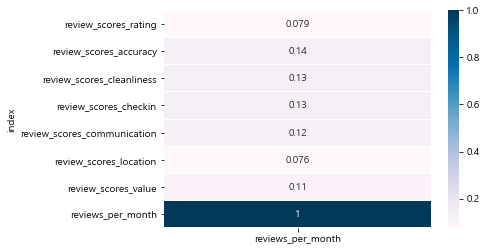

In [45]:
sns.heatmap(df.corr()['reviews_per_month'].reset_index().set_index('index'), linewidths = 0.1, vmax = 1,  
            cmap = colormap, linecolor = "white", annot = True)
plt.show()

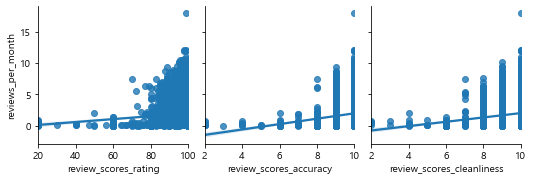

In [47]:
sns.pairplot(data=data,y_vars='reviews_per_month',x_vars=['review_scores_rating','review_scores_accuracy','review_scores_cleanliness'],kind='reg')
plt.show()

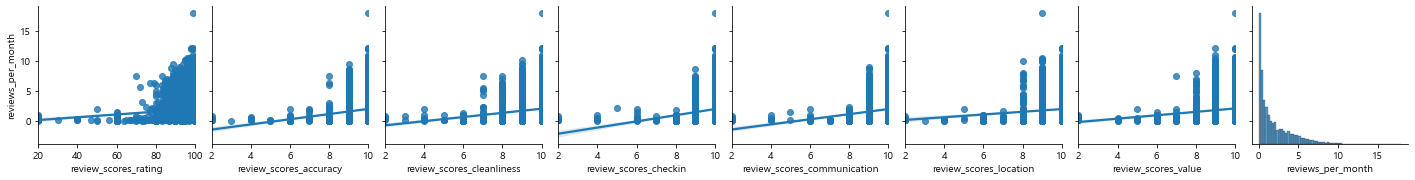

In [48]:
sns.pairplot(df,kind='reg',x_vars=df.columns, y_vars='reviews_per_month')
plt.show()

In [32]:
from statsmodels.graphics.mosaicplot import mosaic

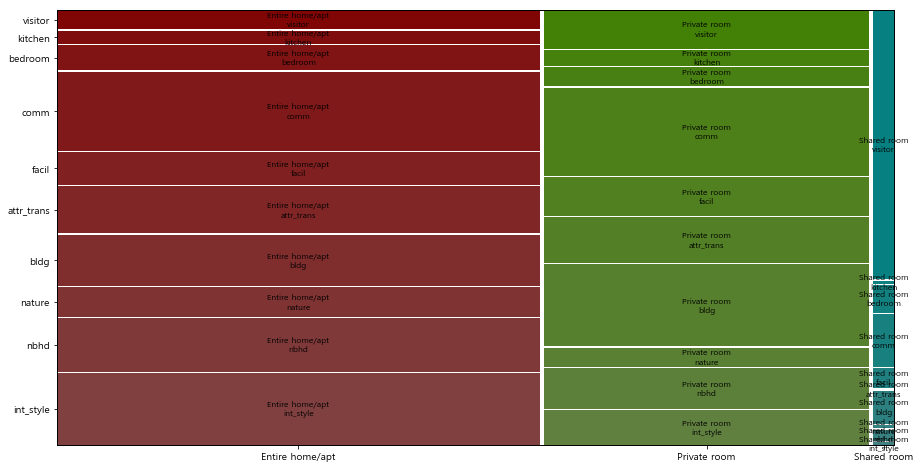

In [33]:
plt.rcParams['figure.figsize'] = [15, 8]

mosaic(data.sort_values('room_type'),['room_type','most_freq_aspect'],axes_label=True)
plt.show()

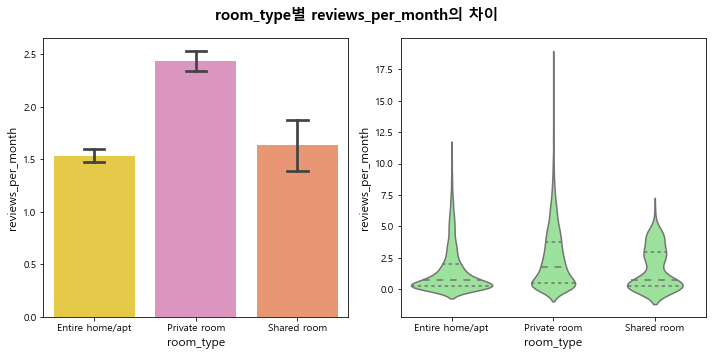

In [51]:
f,ax=plt.subplots(1, 2, figsize=(10,5))

sns.barplot(x='room_type', y='reviews_per_month', data=data, palette='Set2_r',ci=95, capsize=0.2, ax = ax[0])
ax[0].set_xlabel('room_type',fontsize=12)
ax[0].set_ylabel('reviews_per_month',fontsize=12)

sns.violinplot(x="room_type", y="reviews_per_month", data = data, inner='quartile', color='lightgreen', ax=ax[1])
ax[1].set_xlabel('room_type', fontsize=12)
ax[1].set_ylabel('reviews_per_month', fontsize=12)

f.suptitle("room_type별 reviews_per_month의 차이", fontsize= 15, fontweight='bold') #전체 타이틀
f.tight_layout() # subplots 사이 간격 만들어주기
plt.show()

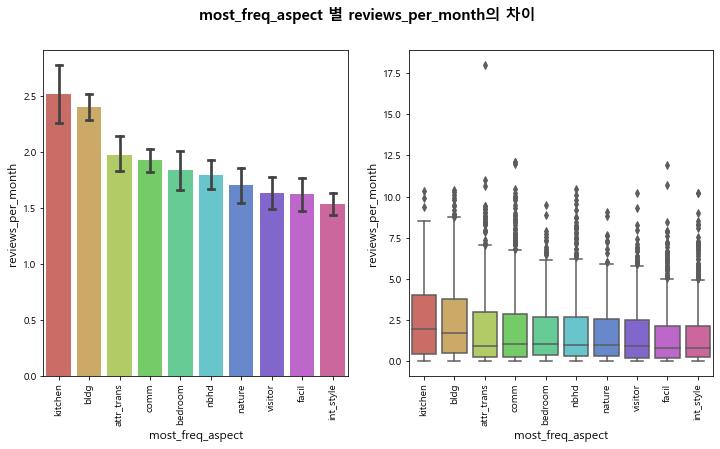

In [101]:
f,ax=plt.subplots(1,2,figsize=(12,6))

sns.barplot(x='most_freq_aspect',y='reviews_per_month',data=data, palette='hls', ci=90, capsize=0.2,ax=ax[0])
ax[0].set_xticklabels(most_freq_aspect_labels, rotation='vertical')
ax[0].set_xlabel('most_freq_aspect',fontsize=12)
ax[0].set_ylabel('reviews_per_month',fontsize=12)

sns.boxplot(x='most_freq_aspect',y='reviews_per_month',data=data, palette='hls', ax=ax[1])
ax[1].set_xticklabels(most_freq_aspect_labels, rotation='vertical')
ax[1].set_xlabel('most_freq_aspect',fontsize=12)
ax[1].set_ylabel('reviews_per_month',fontsize=12)

f.suptitle('most_freq_aspect 별 reviews_per_month의 차이', fontsize=15, fontweight='bold') #전체 타이틀
plt.show()

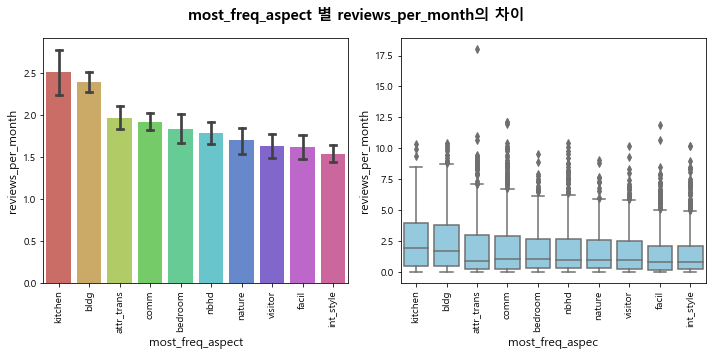

In [66]:
f,ax=plt.subplots(1, 2, figsize=(10,5))

sns.barplot(x='most_freq_aspect', y='reviews_per_month', data=data, palette='hls',ci=90, capsize=0.2, ax= ax[0], order=most_freq_aspect_labels)

ax[0].set_xticklabels(most_freq_aspect_labels, rotation='vertical')
ax[0].set_xlabel('most_freq_aspect',fontsize=12)
ax[0].set_ylabel('reviews_per_month',fontsize=12)

sns.boxplot(x="most_freq_aspect", y="reviews_per_month", data = data,color='skyblue', ax=ax[1], order=most_freq_aspect_labels)

ax[1].set_xlabel('most_freq_aspec', fontsize=12)
ax[1].set_ylabel('reviews_per_month', fontsize=12)
ax[1].set_xticklabels(most_freq_aspect_labels, rotation='vertical')

f.suptitle('most_freq_aspect 별 reviews_per_month의 차이', fontsize=15, fontweight='bold') #전체 타이틀
f.tight_layout()
plt.show()

C:\Users\JangSeongHyun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\JangSeongHyun\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


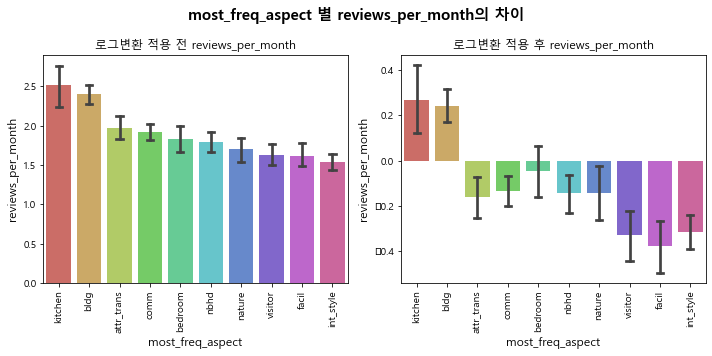

In [68]:
data2 = data.copy()
data2['reviews_per_month'] = np.log(data['reviews_per_month'])

f,ax=plt.subplots(1, 2, figsize=(10,5))

sns.barplot(x='most_freq_aspect', y='reviews_per_month', data=data, order=most_freq_aspect_labels, 
            palette='hls',ci=90, capsize=0.2, ax= ax[0])
ax[0].set_xticklabels(most_freq_aspect_labels, rotation='vertical')
ax[0].set_xlabel('most_freq_aspect',fontsize=12)
ax[0].set_ylabel('reviews_per_month',fontsize=12)
ax[0].set_title("로그변환 적용 전 reviews_per_month", fontsize=12)

sns.barplot(x="most_freq_aspect", y="reviews_per_month", data = data2, order=most_freq_aspect_labels,
            ci=90, capsize=0.2, ax=ax[1], palette='hls')
ax[1].set_xticklabels(most_freq_aspect_labels, rotation='vertical')
ax[1].set_title("로그변환 적용 후 reviews_per_month", fontsize=12)
ax[1].set_xlabel('most_freq_aspect',fontsize=12)
ax[1].set_ylabel('reviews_per_month',fontsize=12)

f.suptitle('most_freq_aspect 별 reviews_per_month의 차이', fontsize=15, fontweight='bold')
f.tight_layout()
plt.show()

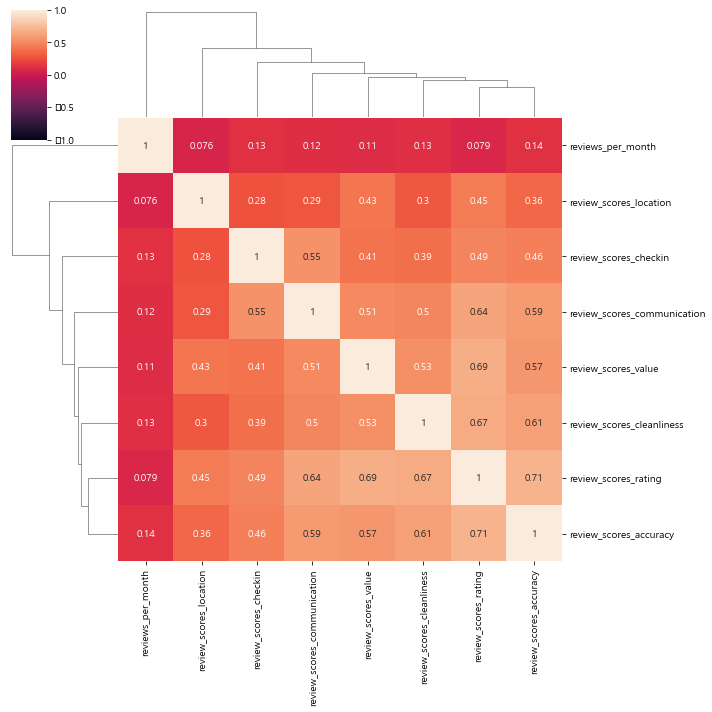

In [107]:
df=data[['review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value','reviews_per_month']]
sns.clustermap(df.corr(),annot=True, vmin=-1, vmax=1)

<AxesSubplot:>

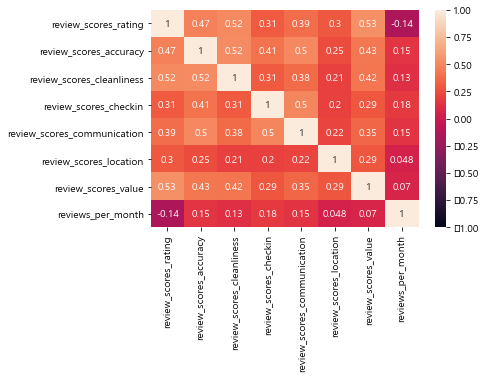

In [108]:
spear=df.corr(method='spearman')
sns.heatmap(spear,vmin=-1,vmax=1,annot=True)

상관성이 선형적인 상관성만 존재하는 것이 아닌지 확인하기위해 \
스피어만 상관계수를 통한 heatmap도 그려보았는게 거의 유사한것으로 보아 \
현재의 데이터에서의상관성들은 대부분 선형성을 띄는 상관성일 가능성이 높다.

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
model = smf.ols('reviews_per_month ~ most_freq_aspect', data = data).fit()
display(model.summary().tables[1])
display(anova_lm(model))

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,1.9714,0.081,24.414,0.000,1.813,2.130
most_freq_aspect[T.bedroom],-0.1370,0.140,-0.976,0.329,-0.412,0.138
most_freq_aspect[T.bldg],0.4292,0.106,4.050,0.000,0.221,0.637
most_freq_aspect[T.comm],-0.0485,0.101,-0.482,0.630,-0.246,0.149
most_freq_aspect[T.facil],-0.3511,0.123,-2.854,0.004,-0.592,-0.110
most_freq_aspect[T.int_style],-0.4347,0.109,-3.990,0.000,-0.648,-0.221
most_freq_aspect[T.kitchen],0.5434,0.166,3.274,0.001,0.218,0.869
most_freq_aspect[T.nature],-0.2725,0.136,-2.001,0.045,-0.539,-0.006
most_freq_aspect[T.nbhd],-0.1790,0.113,-1.582,0.114,-0.401,0.043
most_freq_aspect[T.visitor],-0.3422,0.124,-2.751,0.006,-0.586,-0.098


,df,sum_sq,mean_sq,F,PR(>F)
most_freq_aspect,9.0,512.234976,56.914997,13.266568,2.959034e-21
Residual,6095.0,26148.203541,4.290107,NaN,NaN


In [13]:
display(anova_lm(model))

,df,sum_sq,mean_sq,F,PR(>F)
most_freq_aspect,9.0,512.234976,56.914997,13.266568,2.959034e-21
Residual,6095.0,26148.203541,4.290107,NaN,NaN
